In [1]:
%matplotlib notebook

import numpy as np
from numpy import random

# dimensionality reduction and visualization
import anndata as ad
from scanpy.api.tl import diffmap
import matplotlib.pyplot as plt

# make sure to use viridis as the default color map
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'viridis'

from prosstt import tree
from prosstt import simulation as sim

/home/npapado/miniconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# set random seed
rseed = 42
random.seed(rseed)

In [3]:
t = tree.Tree()
X, pseudotimes, branch, scalings = sim.sample_whole_tree_restricted(t)

# normalize gene expression by library size
X = (X.transpose() / scalings).transpose()

/home/npapado/miniconda2/envs/py36/lib/python3.6/site-packages/prosstt/simulation.py:180: UserWarning: No argument 'a' specified in kwargs: using gamma and a=0.05
  "No argument 'a' specified in kwargs: using gamma and a=0.05", UserWarning)
/home/npapado/miniconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


 |███████████████████████████████████████████████████████████████████████████████-| 98.8% 

<IPython.core.display.Javascript object>


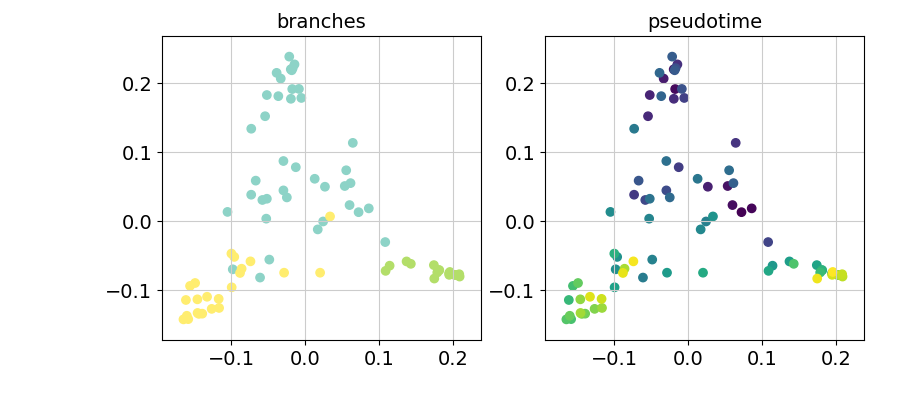

Text(0.5,1,'pseudotime')

In [4]:
data = ad.AnnData(X)
diffmap(adata=data)
dm = data.obsm["X_diffmap"]

br_names, indices = np.unique(branch, return_inverse=True)

fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(w=9, h=4)
ax[0].scatter(dm[:, 0], dm[:, 1], c=indices, cmap="Set3")
ax[0].set_title("branches")
# mpl.rcParams['image.cmap'] = 'viridis'
ax[1].scatter(dm[:, 0], dm[:, 1], c=pseudotimes, cmap="viridis")
ax[1].set_title("pseudotime")